# **Hands on #1**
# Build a Convolutional Neural network for training and classifying MNIST dataset.
-------------------------------------------------

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers


import numpy as np

Using TensorFlow backend.


# **Load MNIST dataset**

In [2]:
# load dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print(y_train.dtype)

11493376/11490434 [==============================] - 2s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)
uint8


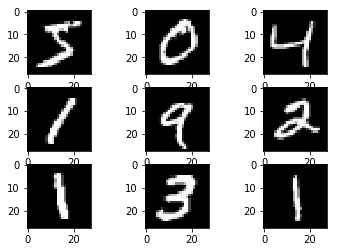

In [3]:
from matplotlib import pyplot

# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

# **Data Preprocessing**

In [0]:
num_classes = 10

# Transform dataframe to 4 dimensions
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

# Normalize the dataset
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert labels to categorical
from keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


# **Creating a model with the sequential API**

In [0]:
input_shape = (x_train.shape[1], x_train.shape[2], 1)


model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


In [9]:
model.fit(x_train, y_train, batch_size=32, epochs=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/2
60000/60000 [==============================] - 19s 319us/step - loss: 0.3971 - acc: 0.8710
Epoch 2/2
60000/60000 [==============================] - 12s 208us/step - loss: 0.1387 - acc: 0.9589


In [10]:
score = model.evaluate(x_test, y_test)
print("Accuracy on test set: ",score[1])

10000/10000 [==============================] - 1s 82us/step
Accuracy on test set:  0.9849


# **Data Augmentation**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
  rotation_range=10,
  zoom_range=0.1,
  width_shift_range=0.1,
  height_shift_range=0.1
)

In [12]:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=32), epochs=2)


Epoch 1/2
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3395 - acc: 0.8946
Epoch 2/2
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2263 - acc: 0.9307


In [13]:
score = model.evaluate(x_test, y_test)
print("Accuracy on test set: ",score[1])

10000/10000 [==============================] - 1s 75us/step
Accuracy on test set:  0.9875
